In [46]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as un
from scipy import constants as cs
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Daten einlesen
r_3d,m1,m2,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
# 'C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat'

In [112]:
mges=m1+m2

ni=5754

xi=x[ni]
yi=y[ni]
zi=z[ni]

vxi=vx[ni]
vyi=vy[ni]
vzi=vz[ni]

xim=un.pc.to(un.m, xi)
yim=un.pc.to(un.m, yi)
zim=un.pc.to(un.m, zi)

x0=xim
y0=yim
z0=zim

kms=un.km/un.s
ms=un.m/un.s

r=np.sqrt(x**2+y**2+z**2)
ri=r[ni]
rim=un.pc.to(un.m,ri)

vxim=kms.to(ms,vxi)
vyim=kms.to(ms,vyi)
vzim=kms.to(ms,vzi)

vx0=vxim
vy0=vyim
vz0=vzim


N=1000000
start=0
end=1e14
t=np.linspace(start,end,N)
dt=t[1]-t[0]

In [113]:
# some potential
b=10
phi=-cs.G*mges/(b+np.sqrt(b**2+rim**2))
phi_dyn=-cs.G/(b+np.sqrt(b**2+rim**2))

def force_isochrone(x,y,z):

    r=np.sqrt(x**2+y**2+z**2)
#    phi=-cs.G*mges/(b+np.sqrt(b**2+r**2))
    a=np.zeros(3)
    a[0]=-cs.G*x/(np.sqrt(b**2+r**2)*(np.sqrt(b**2+r**2)+b)**2)
    a[1]=-cs.G*y/(np.sqrt(b**2+r**2)*(np.sqrt(b**2+r**2)+b)**2)
    a[2]=-cs.G*z/(np.sqrt(b**2+r**2)*(np.sqrt(b**2+r**2)+b)**2)
    return a


leapfrog:

$x_{i+1}=x_i+v_i\Delta t+\frac{a_i(x_i)}{2}\Delta t^2$

$v_{i+1}=v_i+\frac{a(x_{i+1})+a(x_i)}{2}\Delta t$

In [114]:
#leapfrog
xl=np.zeros(N+1)
yl=np.zeros(N+1)
zl=np.zeros(N+1)

x_l=np.sqrt(xl**2+yl**2+zl**2)

vxl=np.zeros(N+1)
vyl=np.zeros(N+1)
vzl=np.zeros(N+1)

xl[0]=x0
yl[0]=y0
zl[0]=z0

vxl[0]=vx0
vyl[0]=vy0
vzl[0]=vz0

for i in range(N):
    xl[0]=x0
    yl[0]=y0
    zl[0]=z0
    
    a=force_isochrone(xl[i],yl[i],zl[i])
    
    xl[i+1]=xl[i]+vxl[i]*dt+1./2.*a[0]*dt**2
    yl[i+1]=yl[i]+vyl[i]*dt+1./2.*a[1]*dt**2
    zl[i+1]=zl[i]+vzl[i]*dt+1./2.*a[2]*dt**2
    
    a_1=force_isochrone(xl[i+1],yl[i+1],zl[i+1])
    
    vxl[i+1]=vxl[i]+1./2.*(a[0]+a_1[0])*dt
    vyl[i+1]=vyl[i]+1./2.*(a[1]+a_1[1])*dt
    vzl[i+1]=vzl[i]+1./2.*(a[2]+a_1[2])*dt


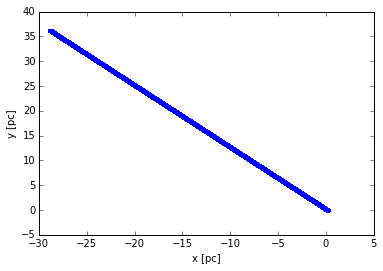

In [115]:
xlpc=un.m.to(un.pc,xl)
ylpc=un.m.to(un.pc,yl)
zlpc=un.m.to(un.pc,zl)
plt.plot(xlpc,ylpc,'.')
plt.xlabel('x [pc]')
plt.ylabel('y [pc]')

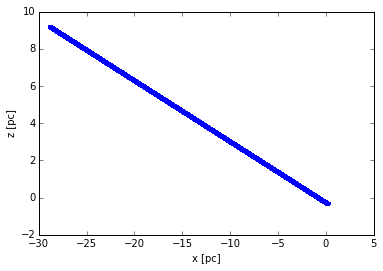

In [116]:
plt.plot(xlpc,zlpc,'.')
plt.xlabel('x [pc]')
plt.ylabel('z [pc]')

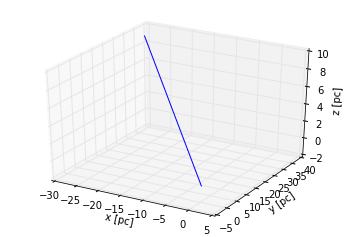

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xlpc,ylpc,zlpc)
ax.set_xlabel('x [pc]')
ax.set_ylabel('y [pc]')
ax.set_zlabel('z [pc]')

In [118]:
a[0]

1.9062128736071139e-47

In [93]:
xlpc

array([  0.19045   ,   0.19042087,   0.19039175, ..., -28.93466361,
       -28.93469274, -28.93472186])

In [94]:
ylpc

array([ -5.40725000e-03,  -5.37087319e-03,  -5.33449638e-03, ...,
         3.63713317e+01,   3.63713680e+01,   3.63714044e+01])

In [95]:
a

array([  1.90621287e-47,  -2.39613984e-47,  -6.08252246e-48])

In [96]:
a_1

array([  1.90620905e-47,  -2.39613502e-47,  -6.08251043e-48])

In [97]:
x0/vx0


-653902374731.75574